# Import Entsoe datas

In [1]:
import import_ipynb
from entsoe import EntsoePandasClient
import pandas as pd
from datetime import datetime
import sqlite3
from sqlite3 import Error

In [335]:
client = EntsoePandasClient(api_key = "your Entsoe_api_key")

start = pd.Timestamp('20210101', tz='Europe/Bucharest')
end = pd.Timestamp('20220101', tz='Europe/Bucharest')

country_code = 'RO'  # Romania
country_code_from = 'BG' # Bulgaria 
country_code_to = 'RO'
type_marketagreement_type = 'A01'

>The following function was made in order to make sure that all the variables timestamps 
has the same unit (hour) and time zone. At first glance, it may not appear necessary but
starting to fall 2020 all the variables had a periodicity from 15 min, while until then
was 1 hour. Besides all that, while most of the variables start from the day mentioned
on 'start' at 00:00:00 and end on the day before the day mentioned at 'end' at 23:00:00,
the cross-border flows are different.

In [336]:
def convert_timestamp(df):
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    df['timestamp'] = df['timestamp'].dt.tz_convert('Europe/Bucharest')
    df['timestamp'] = df['timestamp'].dt.strftime('%Y-%m-%d %H:%M:%S')
    
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    df.set_index('timestamp', inplace = True)
    df = df.resample('1H').mean()  
    return df

In [337]:
el_gen = pd.DataFrame(client.query_generation(country_code, start=start,end=end, psr_type=None))
el_gen = el_gen.reset_index()
el_gen = el_gen.rename(columns = {"index":"timestamp"})
el_gen

,timestamp,Biomass,Fossil Brown coal/Lignite,Fossil Gas,Fossil Hard coal,Hydro Run-of-river and poundage,Hydro Water Reservoir,Nuclear,Solar,Wind Onshore
0,2021-01-01 00:00:00+02:00,69.0,1279.0,1326.0,115.0,1491.0,375.0,1423.0,0.0,602.0
1,2021-01-01 01:00:00+02:00,62.0,882.0,1212.0,107.0,1213.0,260.0,1423.0,0.0,890.0
2,2021-01-01 02:00:00+02:00,60.0,752.0,1166.0,113.0,1193.0,131.0,1423.0,0.0,1032.0
3,2021-01-01 03:00:00+02:00,60.0,749.0,1162.0,112.0,1176.0,97.0,1422.0,0.0,973.0
4,2021-01-01 04:00:00+02:00,60.0,771.0,1191.0,102.0,1221.0,208.0,1422.0,0.0,715.0
...,...,...,...,...,...,...,...,...,...,...
31835,2021-12-31 22:45:00+02:00,62.0,923.0,1136.0,48.0,1597.0,297.0,1417.0,0.0,1114.0
31836,2021-12-31 23:00:00+02:00,60.0,936.0,1155.0,48.0,1401.0,238.0,1417.0,0.0,1093.0
31837,2021-12-31 23:15:00+02:00,59.0,940.0,1148.0,49.0,1366.0,226.0,1416.0,0.0,1125.0
31838,2021-12-31 23:30:00+02:00,58.0,946.0,1150.0,49.0,1368.0,227.0,1417.0,0.0,1089.0


In [338]:
try:
    el_gen = convert_timestamp(el_gen)
except:
    print("Sorry! This function works only once (the results bellow are from the first try)!")
    pass
el_gen

,Biomass,Fossil Brown coal/Lignite,Fossil Gas,Fossil Hard coal,Hydro Run-of-river and poundage,Hydro Water Reservoir,Nuclear,Solar,Wind Onshore
timestamp,,,,,,,,,
2021-01-01 00:00:00,69.00,1279.00,1326.00,115.00,1491.00,375.00,1423.00,0.00,602.0
2021-01-01 01:00:00,62.00,882.00,1212.00,107.00,1213.00,260.00,1423.00,0.00,890.0
2021-01-01 02:00:00,60.00,752.00,1166.00,113.00,1193.00,131.00,1423.00,0.00,1032.0
2021-01-01 03:00:00,60.00,749.00,1162.00,112.00,1176.00,97.00,1422.00,0.00,973.0
2021-01-01 04:00:00,60.00,771.00,1191.00,102.00,1221.00,208.00,1422.00,0.00,715.0
...,...,...,...,...,...,...,...,...,...
2021-12-31 19:00:00,60.75,948.00,1299.50,48.00,1618.75,425.25,1404.50,0.00,1305.0
2021-12-31 20:00:00,63.25,901.25,1142.00,47.50,1584.75,385.75,1410.50,0.00,1271.0
2021-12-31 21:00:00,61.75,926.75,1144.75,49.00,1608.00,330.25,1413.00,0.00,1077.0


In [1]:
el_gen.iloc[:24,:].plot(figsize = (18, 6), xlabel = 'Time (hours)', ylabel = 'Power Generated (MW)', title = "Power Generation" );

NameError: name 'el_gen' is not defined

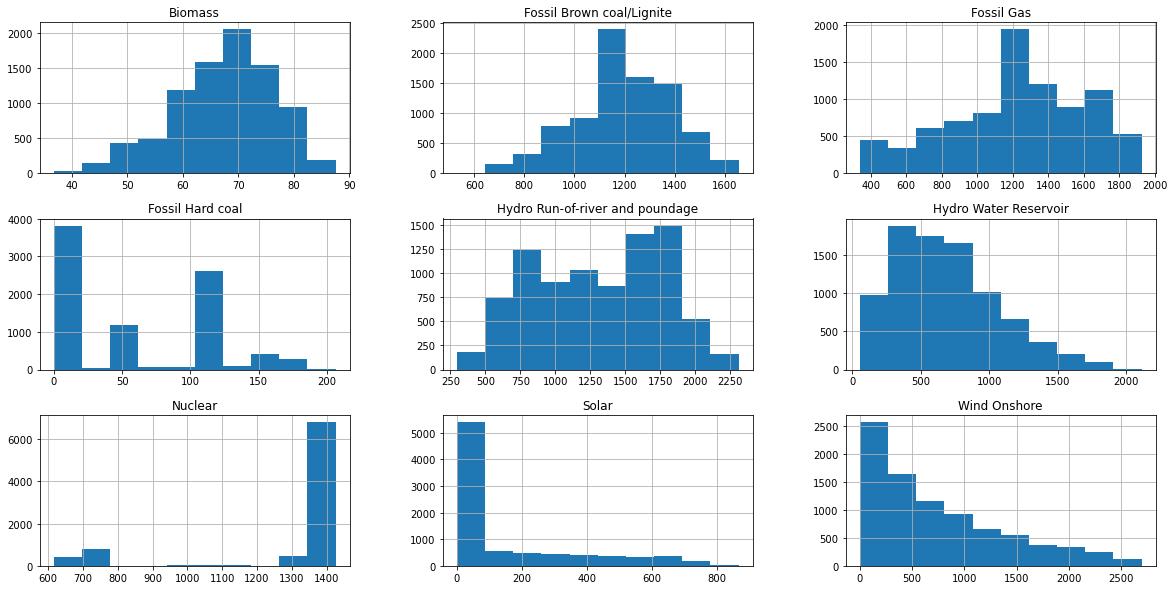

In [340]:
el_gen.hist(figsize = (20, 10));

In [341]:
el_gen_forecasted = pd.DataFrame(client.query_generation_forecast(country_code, start=start,end=end))
el_gen_forecasted = el_gen_forecasted.reset_index()
el_gen_forecasted.columns = ["timestamp", "en_gen_forecasted"]
el_gen_forecasted

,timestamp,en_gen_forecasted
0,2021-01-01 00:00:00+02:00,6779.0
1,2021-01-01 01:00:00+02:00,6221.0
2,2021-01-01 02:00:00+02:00,6068.0
3,2021-01-01 03:00:00+02:00,5974.0
4,2021-01-01 04:00:00+02:00,5914.0
...,...,...
32869,2021-12-31 22:45:00+02:00,6425.0
32870,2021-12-31 23:00:00+02:00,6118.0
32871,2021-12-31 23:15:00+02:00,6117.0
32872,2021-12-31 23:30:00+02:00,6117.0


In [342]:
try:
    el_gen_forecasted = convert_timestamp(el_gen_forecasted)
except:
    print("Sorry! This function works only once (the results bellow are from the first try)!")
    pass
el_gen_forecasted

,en_gen_forecasted
timestamp,
2021-01-01 00:00:00,6779.0
2021-01-01 01:00:00,6221.0
2021-01-01 02:00:00,6068.0
2021-01-01 03:00:00,5974.0
2021-01-01 04:00:00,5914.0
...,...
2021-12-31 19:00:00,6848.5
2021-12-31 20:00:00,6657.0
2021-12-31 21:00:00,6540.0


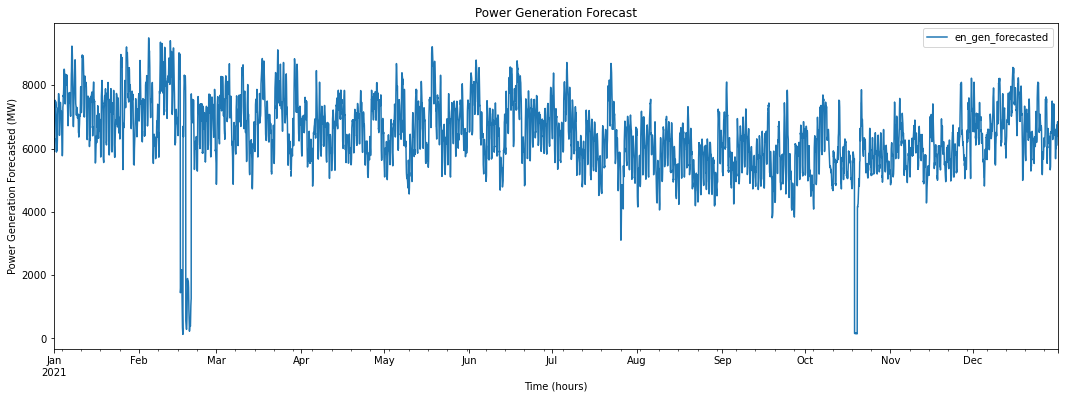

In [343]:
el_gen_forecasted.plot(figsize = (18, 6), xlabel = 'Time (hours)', ylabel = 'Power Generation Forecasted (MW)', title = "Power Generation Forecast" );

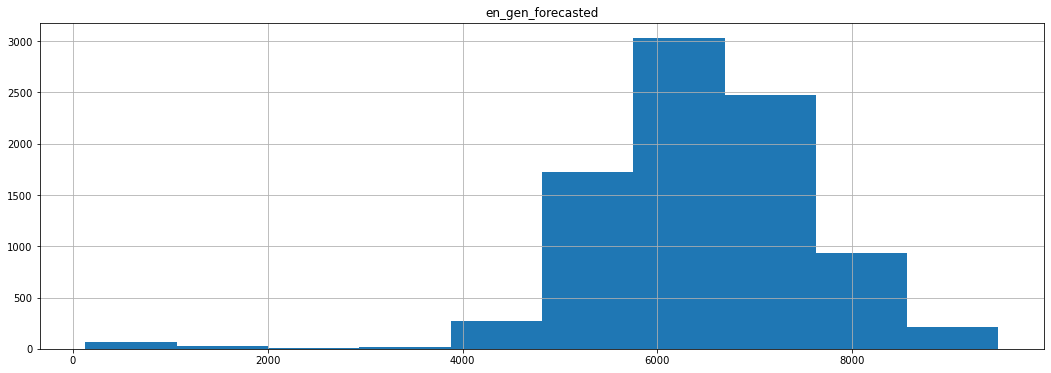

In [344]:
el_gen_forecasted.hist(figsize = (18, 6));

In [345]:
forcasted_load = client.query_load_forecast(country_code, start=start,end=end)
forcasted_load = forcasted_load.reset_index()
forcasted_load.columns = ['timestamp', 'forecasted_load']
forcasted_load

,timestamp,forecasted_load
0,2021-01-01 00:00:00+02:00,6220.0
1,2021-01-01 01:00:00+02:00,5970.0
2,2021-01-01 02:00:00+02:00,5750.0
3,2021-01-01 03:00:00+02:00,5550.0
4,2021-01-01 04:00:00+02:00,5480.0
...,...,...
32869,2021-12-31 22:45:00+02:00,6720.0
32870,2021-12-31 23:00:00+02:00,6630.0
32871,2021-12-31 23:15:00+02:00,6530.0
32872,2021-12-31 23:30:00+02:00,6440.0


In [346]:
try:
    forcasted_load = convert_timestamp(forcasted_load)
except:
    print("Sorry! This function works only once (the results bellow are from the first try)!")
    pass
forcasted_load

,forecasted_load
timestamp,
2021-01-01 00:00:00,6220.0
2021-01-01 01:00:00,5970.0
2021-01-01 02:00:00,5750.0
2021-01-01 03:00:00,5550.0
2021-01-01 04:00:00,5480.0
...,...
2021-12-31 19:00:00,7802.5
2021-12-31 20:00:00,7512.5
2021-12-31 21:00:00,7180.0


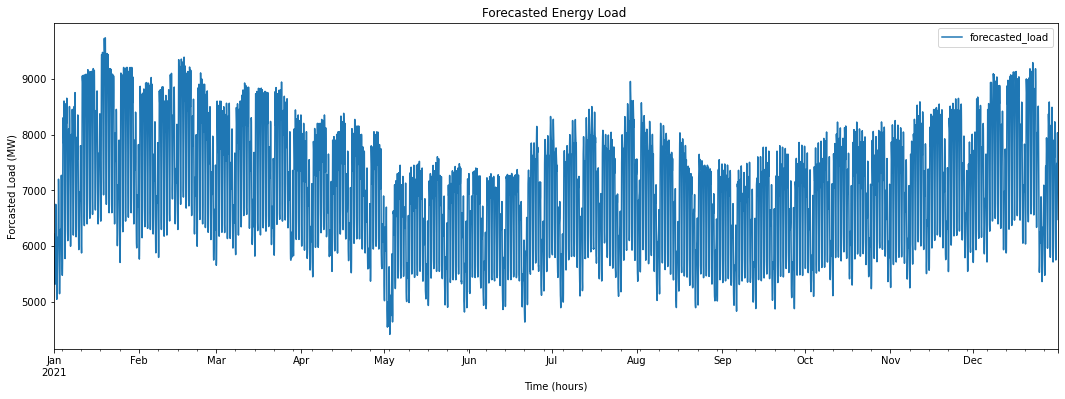

In [347]:
forcasted_load.plot(figsize = (18, 6), xlabel = 'Time (hours)', ylabel = 'Forcasted Load (MW)', title = "Forecasted Energy Load " );

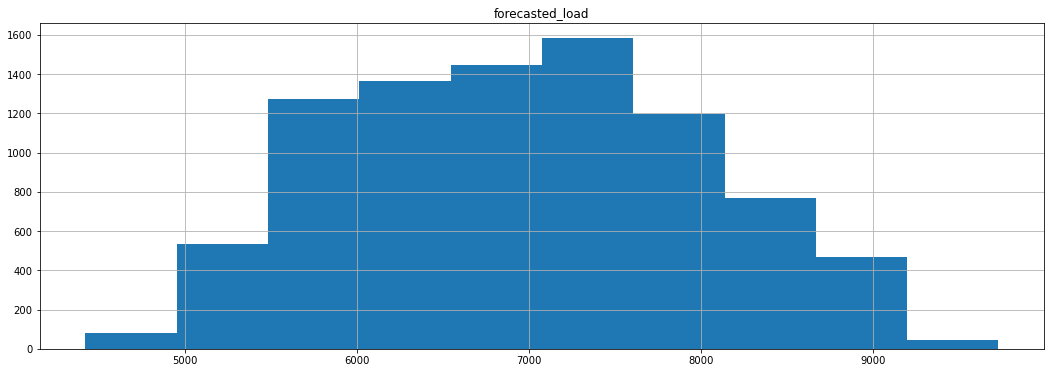

In [348]:
forcasted_load.hist(figsize = (18, 6));

In [349]:
load_energy = client.query_load(country_code, start=start,end=end)
load_energy = load_energy.reset_index()
load_energy.columns = ['timestamp', 'real_load']
load_energy

,timestamp,real_load
0,2021-01-01 00:00:00+02:00,6135.0
1,2021-01-01 01:00:00+02:00,5761.0
2,2021-01-01 02:00:00+02:00,5496.0
3,2021-01-01 03:00:00+02:00,5318.0
4,2021-01-01 04:00:00+02:00,5217.0
...,...,...
31823,2021-12-31 22:45:00+02:00,6472.0
31824,2021-12-31 23:00:00+02:00,6424.0
31825,2021-12-31 23:15:00+02:00,6384.0
31826,2021-12-31 23:30:00+02:00,6332.0


In [350]:
try:
    load_energy = convert_timestamp(load_energy)
except:
    print("Sorry! This function works only once (the results bellow are from the first try)!")
    pass

load_energy

,real_load
timestamp,
2021-01-01 00:00:00,6135.00
2021-01-01 01:00:00,5761.00
2021-01-01 02:00:00,5496.00
2021-01-01 03:00:00,5318.00
2021-01-01 04:00:00,5217.00
...,...
2021-12-31 19:00:00,7577.25
2021-12-31 20:00:00,7227.25
2021-12-31 21:00:00,6839.25


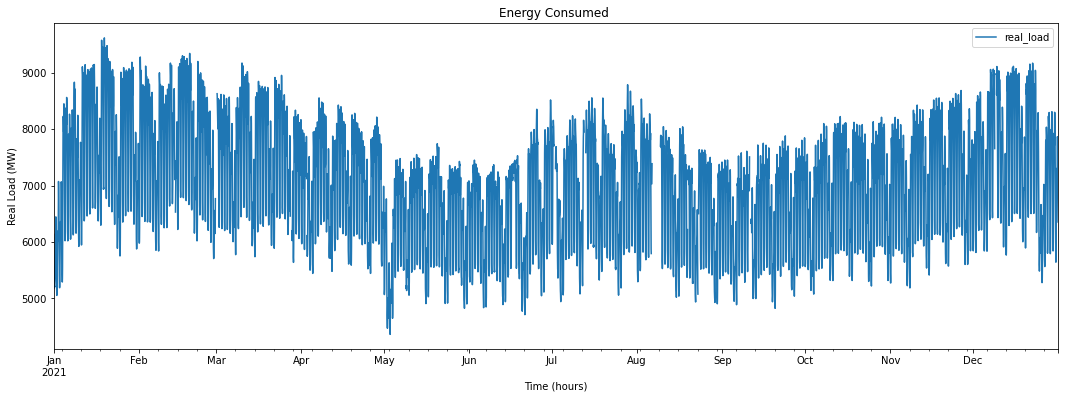

In [351]:
load_energy.plot(figsize = (18, 6), xlabel = 'Time (hours)', ylabel = 'Real Load (MW)', title = "Energy Consumed " );

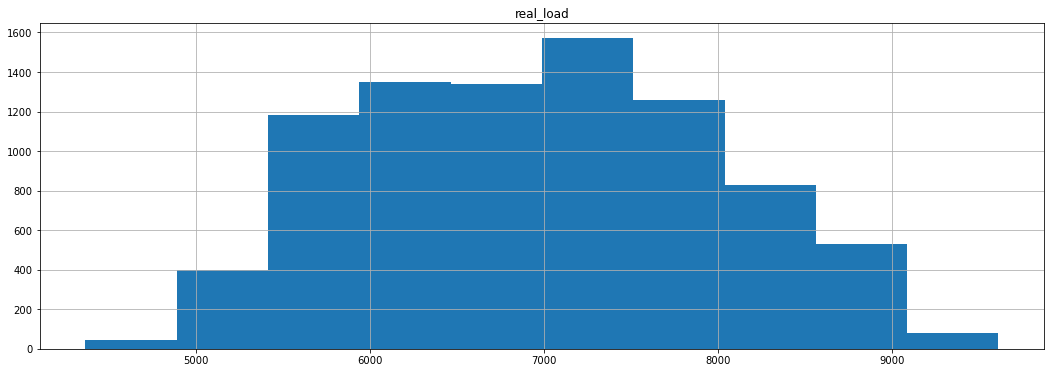

In [352]:
load_energy.hist(figsize = (18, 6));

In [353]:
def crossborders_flow_real():
      
    crossborders_connexion = ['BG', 'HU', 'RS', 'UA', 'MD']
    country = 'RO'
    
    en_exchange_1 = []
    en_exchange_2 = []
    
    for country_code_from in crossborders_connexion:
        try:
            
            country_code_to = country

            crossborders_flows_1 = pd.DataFrame(client.query_crossborder_flows(country_code_from, country_code_to, start=start,end=end))
            crossborders_flows_1 = crossborders_flows_1.reset_index()
            crossborders_flows_1.columns = ['timestamp', f"real_exchange_{country_code_from}_{country_code_to}"]
            crossborders_flows_1 = convert_timestamp(crossborders_flows_1)
        
            en_exchange_1.append(crossborders_flows_1)

            country_code_to = country_code_from
            country_code_from = country

            crossborders_flows_2 = pd.DataFrame(client.query_crossborder_flows(country_code_from, country_code_to, start=start,end=end))
            crossborders_flows_2 = crossborders_flows_2.reset_index()
            crossborders_flows_2.columns = ['timestamp', f"real_exchange_{country_code_from}_{country_code_to}"]
            crossborders_flows_2 = convert_timestamp(crossborders_flows_2)
            
            en_exchange_2.append(crossborders_flows_2)
            
        except:
            print(f"Oops! There is a problem with {country_code_from} datas!")

    return en_exchange_1, en_exchange_2

In [354]:
exchange = crossborders_flow_real()

In [355]:
exchange[0]

[                     real_exchange_BG_RO
 timestamp                               
 2021-01-01 00:00:00                 29.0
 2021-01-01 01:00:00                 75.0
 2021-01-01 02:00:00                 16.0
 2021-01-01 03:00:00                 51.0
 2021-01-01 04:00:00                 73.0
 ...                                  ...
 2021-12-31 19:00:00                228.0
 2021-12-31 20:00:00                152.0
 2021-12-31 21:00:00                166.0
 2021-12-31 22:00:00                182.0
 2021-12-31 23:00:00                193.0
 
 [8760 rows x 1 columns],
                      real_exchange_HU_RO
 timestamp                               
 2021-01-01 00:00:00                 0.00
 2021-01-01 01:00:00                50.00
 2021-01-01 02:00:00                23.00
 2021-01-01 03:00:00                 5.00
 2021-01-01 04:00:00                 3.00
 ...                                  ...
 2021-12-31 19:00:00               288.00
 2021-12-31 20:00:00               326.75
 2021-

In [356]:
import_real = pd.concat(exchange[0], axis=1)

In [357]:
import_real

,real_exchange_BG_RO,real_exchange_HU_RO,real_exchange_RS_RO,real_exchange_UA_RO,real_exchange_MD_RO
timestamp,,,,,
2021-01-01 00:00:00,29.0,0.00,0.0,0.0,0.0
2021-01-01 01:00:00,75.0,50.00,0.0,38.0,0.0
2021-01-01 02:00:00,16.0,23.00,0.0,52.0,0.0
2021-01-01 03:00:00,51.0,5.00,0.0,12.0,0.0
2021-01-01 04:00:00,73.0,3.00,0.0,0.0,0.0
...,...,...,...,...,...
2021-12-31 19:00:00,228.0,288.00,0.0,428.0,0.0
2021-12-31 20:00:00,152.0,326.75,0.0,434.0,0.0
2021-12-31 21:00:00,166.0,297.75,0.0,377.0,0.0


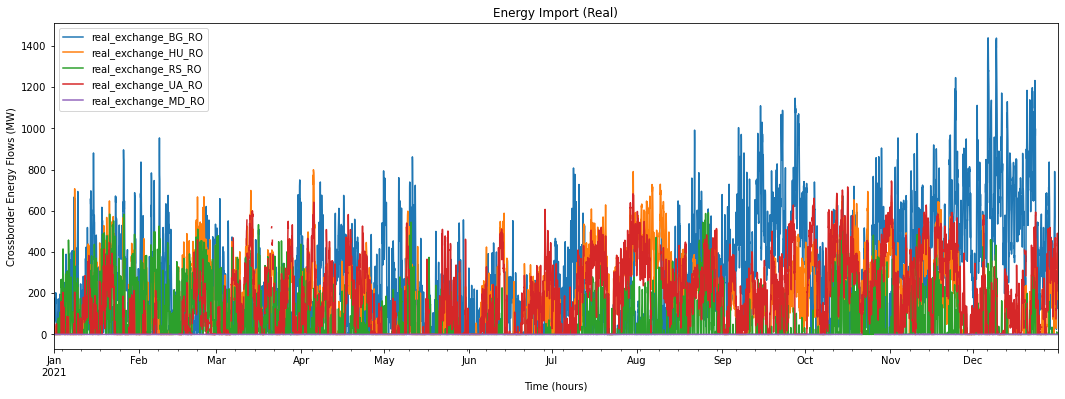

In [358]:
import_real.plot(figsize = (18, 6), xlabel = 'Time (hours)', ylabel = 'Crossborder Energy Flows (MW)', title = "Energy Import (Real)" );

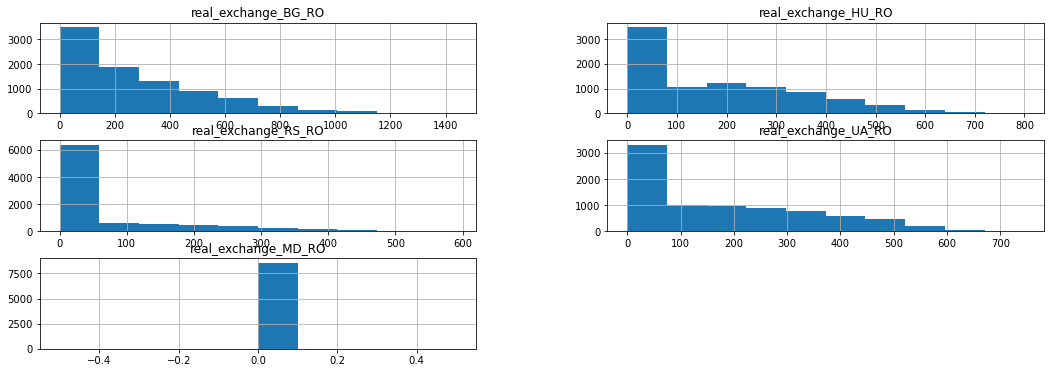

In [359]:
import_real.hist(figsize = (18, 6));

In [360]:
export_real = pd.concat(exchange[1], axis=1)
export_real

,real_exchange_RO_BG,real_exchange_RO_HU,real_exchange_RO_RS,real_exchange_RO_UA,real_exchange_RO_MD
timestamp,,,,,
2021-01-01 00:00:00,283.0,55.0,112.0,115.0,0.0
2021-01-01 01:00:00,391.0,2.0,50.0,0.0,0.0
2021-01-01 02:00:00,443.0,1.0,13.0,0.0,0.0
2021-01-01 03:00:00,416.0,7.0,71.0,0.0,0.0
2021-01-01 04:00:00,324.0,14.0,141.0,62.0,0.0
...,...,...,...,...,...
2021-12-31 19:00:00,223.0,0.0,245.0,0.0,0.0
2021-12-31 20:00:00,220.0,0.0,265.0,0.0,0.0
2021-12-31 21:00:00,151.0,0.0,452.0,0.0,0.0


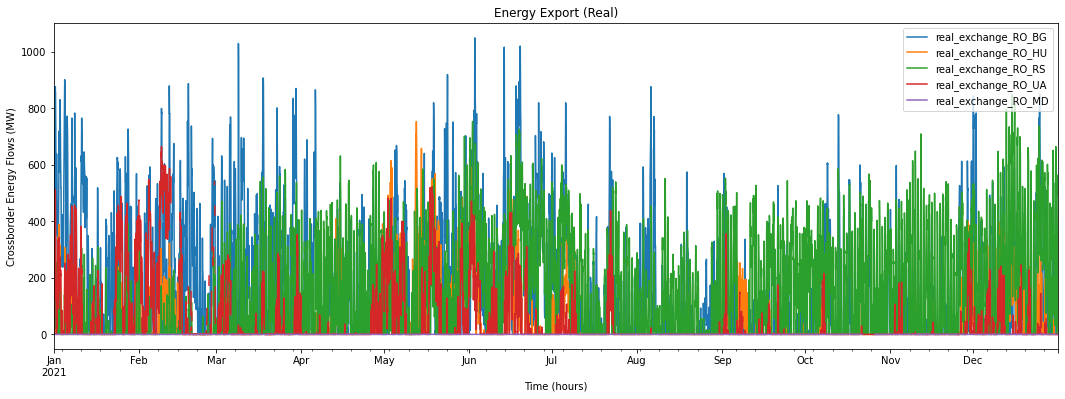

In [361]:
export_real.plot(figsize = (18, 6), xlabel = 'Time (hours)', ylabel = 'Crossborder Energy Flows (MW)', title = "Energy Export (Real)" );

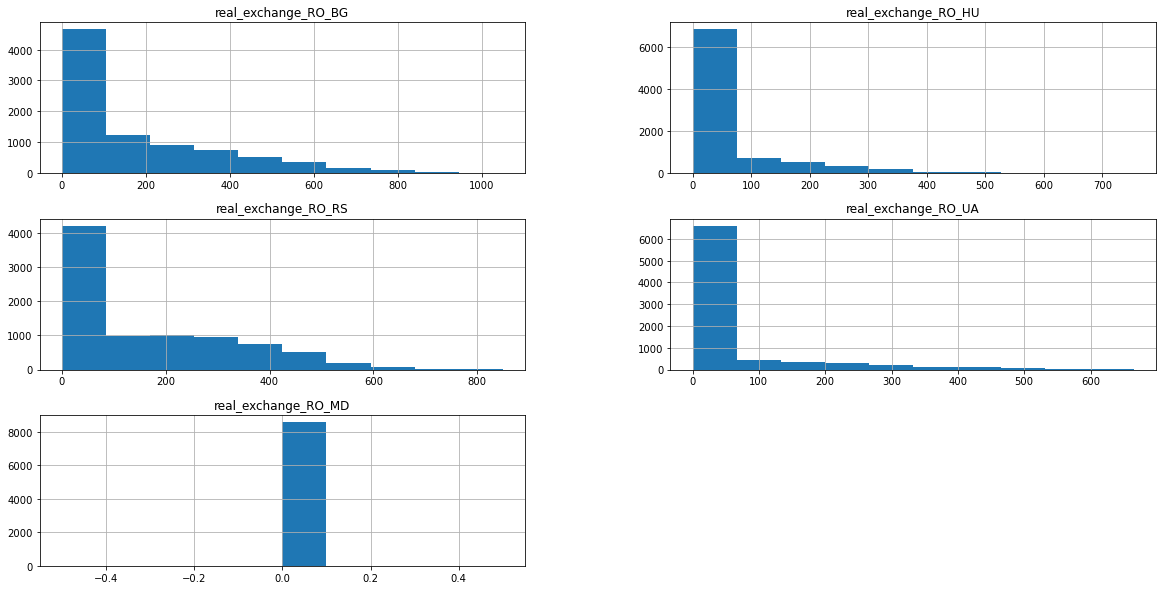

In [386]:
export_real.hist(figsize = (20, 10));

In [363]:
def crossborders_flow_forecasted():
      
    crossborders_connexion = ['BG', 'HU', 'RS', 'UA', 'MD']
    country = 'RO'
    
    en_exchange_1 = []
    en_exchange_2 = []
    
    for country_code_from in crossborders_connexion:
        try:
            
            country_code_to = country

            crossborders_flows_1 = pd.DataFrame(client.query_net_transfer_capacity_dayahead(country_code_from, country_code_to, start = start, end = end))
            crossborders_flows_1 = crossborders_flows_1.reset_index()
            crossborders_flows_1.columns = ['timestamp', f"forecast_exchange_{country_code_from}_{country_code_to}"]
            crossborders_flows_1 = convert_timestamp(crossborders_flows_1)
          
            en_exchange_1.append(crossborders_flows_1)

            country_code_to = country_code_from
            country_code_from = country

            crossborders_flows_2 = pd.DataFrame(client.query_net_transfer_capacity_dayahead(country_code_from, country_code_to, start = start, end = end))
            crossborders_flows_2 = crossborders_flows_2.reset_index()
            crossborders_flows_2.columns = ['timestamp', f"forecast_exchange_{country_code_from}_{country_code_to}"]
            crossborders_flows_2 = convert_timestamp(crossborders_flows_2)
            
            en_exchange_2.append(crossborders_flows_2)
            
        except:
            print(f"Oops! There is a problem with {country_code_from} datas!")

    return en_exchange_1, en_exchange_2

In [364]:
exchange_2 = crossborders_flow_forecasted()

Oops! There is a problem with MD datas!


In [365]:
exchange_2 

([                     forecast_exchange_BG_RO
  timestamp                                   
  2021-01-01 00:00:00                    900.0
  2021-01-01 01:00:00                   1000.0
  2021-01-01 02:00:00                   1000.0
  2021-01-01 03:00:00                   1000.0
  2021-01-01 04:00:00                   1000.0
  ...                                      ...
  2021-12-31 20:00:00                   1200.0
  2021-12-31 21:00:00                   1200.0
  2021-12-31 22:00:00                   1200.0
  2021-12-31 23:00:00                   1200.0
  2022-01-01 00:00:00                   1200.0
  
  [8761 rows x 1 columns],
                       forecast_exchange_HU_RO
  timestamp                                   
  2021-01-01 00:00:00                   1000.0
  2021-01-01 01:00:00                   1000.0
  2021-01-01 02:00:00                   1000.0
  2021-01-01 03:00:00                   1000.0
  2021-01-01 04:00:00                   1000.0
  ...                         

In [366]:
import_forecasted = pd.concat(exchange_2[0], axis=1)
import_forecasted

,forecast_exchange_BG_RO,forecast_exchange_HU_RO,forecast_exchange_RS_RO,forecast_exchange_UA_RO
timestamp,,,,
2021-01-01 00:00:00,900.0,1000.0,700.0,100.0
2021-01-01 01:00:00,1000.0,1000.0,800.0,400.0
2021-01-01 02:00:00,1000.0,1000.0,800.0,400.0
2021-01-01 03:00:00,1000.0,1000.0,800.0,400.0
2021-01-01 04:00:00,1000.0,1000.0,800.0,400.0
...,...,...,...,...
2021-12-31 20:00:00,1200.0,1000.0,500.0,300.0
2021-12-31 21:00:00,1200.0,1000.0,500.0,300.0
2021-12-31 22:00:00,1200.0,1000.0,500.0,300.0


>For an unknown reason, when I downloaded the forecasted cross borders flow, it took 1 extra hour.
To avoid possible problems that could take place because of it, I deleted the extra hour from 
the import forecasted and export forecasted variables.

In [367]:
import_forecasted.drop(import_forecasted.tail(1).index,inplace=True)
import_forecasted

,forecast_exchange_BG_RO,forecast_exchange_HU_RO,forecast_exchange_RS_RO,forecast_exchange_UA_RO
timestamp,,,,
2021-01-01 00:00:00,900.0,1000.0,700.0,100.0
2021-01-01 01:00:00,1000.0,1000.0,800.0,400.0
2021-01-01 02:00:00,1000.0,1000.0,800.0,400.0
2021-01-01 03:00:00,1000.0,1000.0,800.0,400.0
2021-01-01 04:00:00,1000.0,1000.0,800.0,400.0
...,...,...,...,...
2021-12-31 19:00:00,1200.0,1000.0,500.0,300.0
2021-12-31 20:00:00,1200.0,1000.0,500.0,300.0
2021-12-31 21:00:00,1200.0,1000.0,500.0,300.0


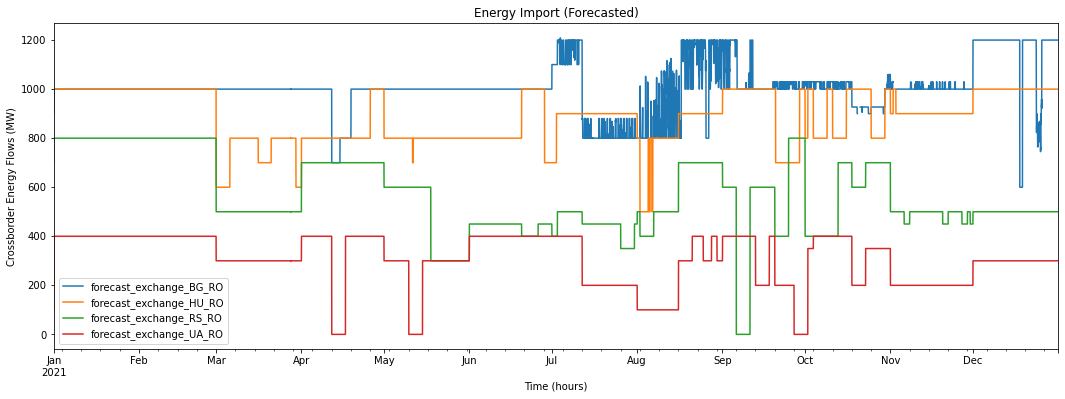

In [368]:
import_forecasted.plot(figsize = (18, 6), xlabel = 'Time (hours)', ylabel = 'Crossborder Energy Flows (MW)', title = "Energy Import (Forecasted)" );

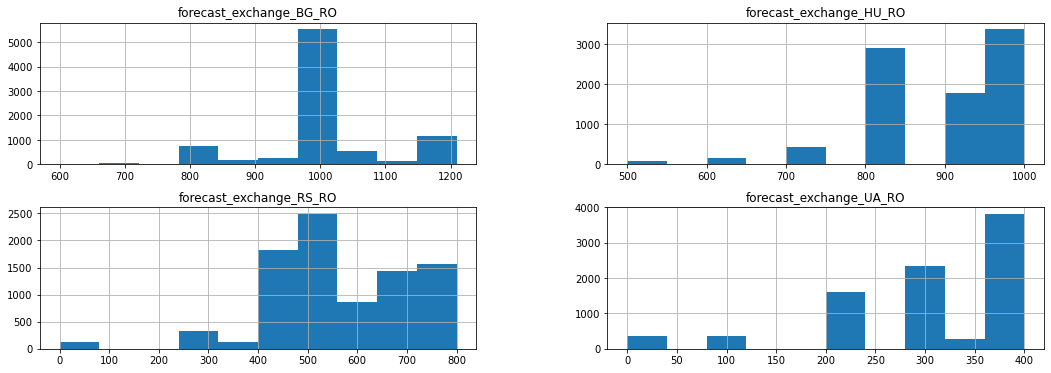

In [369]:
import_forecasted.hist(figsize = (18, 6));

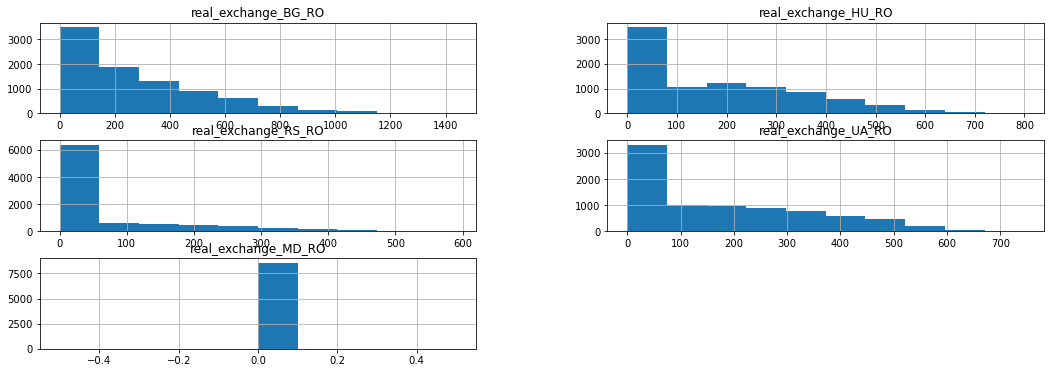

In [370]:
import_real.hist(figsize = (18, 6));

In [371]:
export_forecasted = pd.concat(exchange_2[1], axis=1)
export_forecasted

,forecast_exchange_RO_BG,forecast_exchange_RO_HU,forecast_exchange_RO_RS,forecast_exchange_RO_UA
timestamp,,,,
2021-01-01 00:00:00,900.0,800.0,600.0,100.0
2021-01-01 01:00:00,1000.0,800.0,800.0,200.0
2021-01-01 02:00:00,1000.0,800.0,800.0,200.0
2021-01-01 03:00:00,1000.0,800.0,800.0,200.0
2021-01-01 04:00:00,1000.0,800.0,800.0,200.0
...,...,...,...,...
2021-12-31 20:00:00,1236.0,800.0,500.0,NaN
2021-12-31 21:00:00,1236.0,800.0,500.0,NaN
2021-12-31 22:00:00,1236.0,800.0,500.0,NaN


In [372]:
export_forecasted.drop(export_forecasted.tail(1).index,inplace=True)
export_forecasted

,forecast_exchange_RO_BG,forecast_exchange_RO_HU,forecast_exchange_RO_RS,forecast_exchange_RO_UA
timestamp,,,,
2021-01-01 00:00:00,900.0,800.0,600.0,100.0
2021-01-01 01:00:00,1000.0,800.0,800.0,200.0
2021-01-01 02:00:00,1000.0,800.0,800.0,200.0
2021-01-01 03:00:00,1000.0,800.0,800.0,200.0
2021-01-01 04:00:00,1000.0,800.0,800.0,200.0
...,...,...,...,...
2021-12-31 19:00:00,1236.0,800.0,500.0,NaN
2021-12-31 20:00:00,1236.0,800.0,500.0,NaN
2021-12-31 21:00:00,1236.0,800.0,500.0,NaN


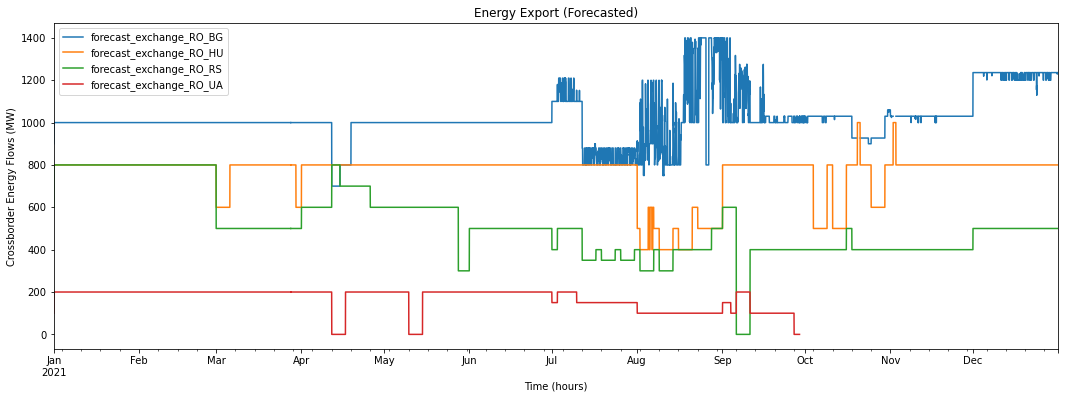

In [373]:
export_forecasted.plot(figsize = (18, 6), xlabel = 'Time (hours)', ylabel = 'Crossborder Energy Flows (MW)', title = "Energy Export (Forecasted)" );

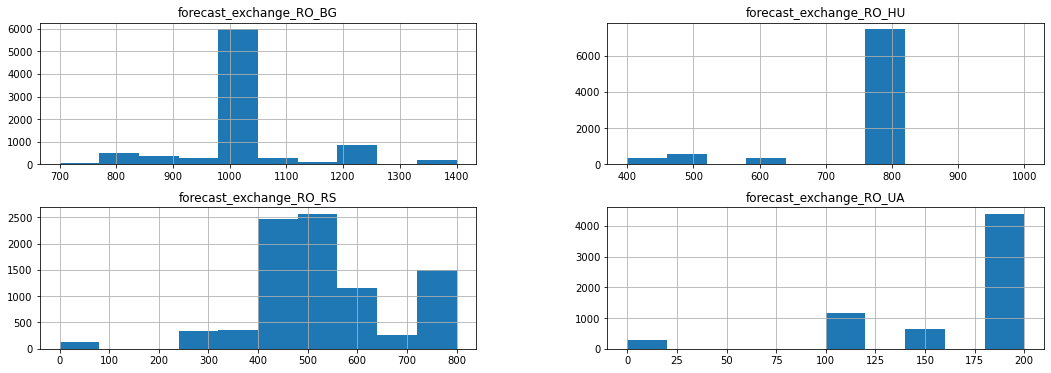

In [374]:
export_forecasted.hist(figsize = (18, 6));

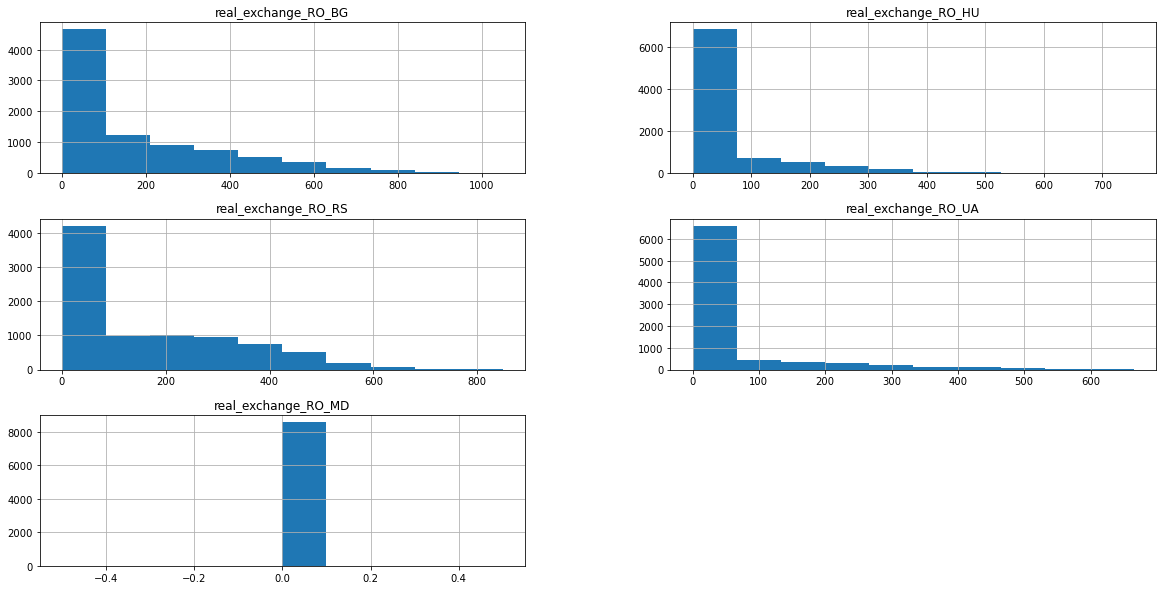

In [375]:
export_real.hist(figsize = (20, 10));

In [376]:
table_1 = [el_gen, el_gen_forecasted, load_energy, forcasted_load, import_real, export_real, import_forecasted, export_forecasted]
entsoe_datas = pd.concat(table_1, axis = 1)
entsoe_datas

,Biomass,Fossil Brown coal/Lignite,Fossil Gas,Fossil Hard coal,Hydro Run-of-river and poundage,Hydro Water Reservoir,Nuclear,Solar,Wind Onshore,en_gen_forecasted,...,real_exchange_RO_UA,real_exchange_RO_MD,forecast_exchange_BG_RO,forecast_exchange_HU_RO,forecast_exchange_RS_RO,forecast_exchange_UA_RO,forecast_exchange_RO_BG,forecast_exchange_RO_HU,forecast_exchange_RO_RS,forecast_exchange_RO_UA
timestamp,,,,,,,,,,,,,,,,,,,,,
2021-01-01 00:00:00,69.00,1279.00,1326.00,115.00,1491.00,375.00,1423.00,0.00,602.0,6779.0,...,115.0,0.0,900.0,1000.0,700.0,100.0,900.0,800.0,600.0,100.0
2021-01-01 01:00:00,62.00,882.00,1212.00,107.00,1213.00,260.00,1423.00,0.00,890.0,6221.0,...,0.0,0.0,1000.0,1000.0,800.0,400.0,1000.0,800.0,800.0,200.0
2021-01-01 02:00:00,60.00,752.00,1166.00,113.00,1193.00,131.00,1423.00,0.00,1032.0,6068.0,...,0.0,0.0,1000.0,1000.0,800.0,400.0,1000.0,800.0,800.0,200.0
2021-01-01 03:00:00,60.00,749.00,1162.00,112.00,1176.00,97.00,1422.00,0.00,973.0,5974.0,...,0.0,0.0,1000.0,1000.0,800.0,400.0,1000.0,800.0,800.0,200.0
2021-01-01 04:00:00,60.00,771.00,1191.00,102.00,1221.00,208.00,1422.00,0.00,715.0,5914.0,...,62.0,0.0,1000.0,1000.0,800.0,400.0,1000.0,800.0,800.0,200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-31 19:00:00,60.75,948.00,1299.50,48.00,1618.75,425.25,1404.50,0.00,1305.0,6848.5,...,0.0,0.0,1200.0,1000.0,500.0,300.0,1236.0,800.0,500.0,NaN
2021-12-31 20:00:00,63.25,901.25,1142.00,47.50,1584.75,385.75,1410.50,0.00,1271.0,6657.0,...,0.0,0.0,1200.0,1000.0,500.0,300.0,1236.0,800.0,500.0,NaN
2021-12-31 21:00:00,61.75,926.75,1144.75,49.00,1608.00,330.25,1413.00,0.00,1077.0,6540.0,...,0.0,0.0,1200.0,1000.0,500.0,300.0,1236.0,800.0,500.0,NaN


> Up until 2020, the Entsoe platform didn't have any information about the energy exchanged
between MD and RO, but starting from 2020 that information appears and can be downloaded. 
In order to keep a consistency in my data, I deleted the data regarding the energy exchange 
between the two countries.

In [377]:
try:
    entsoe_datas.drop('real_exchange_MD_RO', axis=1, inplace=True)
    entsoe_datas.drop('real_exchange_RO_MD', axis=1, inplace=True)
    
except:
    print("This function only works once! \nIf these message appears below it means you tried to run it more than once!")

entsoe_datas

,Biomass,Fossil Brown coal/Lignite,Fossil Gas,Fossil Hard coal,Hydro Run-of-river and poundage,Hydro Water Reservoir,Nuclear,Solar,Wind Onshore,en_gen_forecasted,...,real_exchange_RO_RS,real_exchange_RO_UA,forecast_exchange_BG_RO,forecast_exchange_HU_RO,forecast_exchange_RS_RO,forecast_exchange_UA_RO,forecast_exchange_RO_BG,forecast_exchange_RO_HU,forecast_exchange_RO_RS,forecast_exchange_RO_UA
timestamp,,,,,,,,,,,,,,,,,,,,,
2021-01-01 00:00:00,69.00,1279.00,1326.00,115.00,1491.00,375.00,1423.00,0.00,602.0,6779.0,...,112.0,115.0,900.0,1000.0,700.0,100.0,900.0,800.0,600.0,100.0
2021-01-01 01:00:00,62.00,882.00,1212.00,107.00,1213.00,260.00,1423.00,0.00,890.0,6221.0,...,50.0,0.0,1000.0,1000.0,800.0,400.0,1000.0,800.0,800.0,200.0
2021-01-01 02:00:00,60.00,752.00,1166.00,113.00,1193.00,131.00,1423.00,0.00,1032.0,6068.0,...,13.0,0.0,1000.0,1000.0,800.0,400.0,1000.0,800.0,800.0,200.0
2021-01-01 03:00:00,60.00,749.00,1162.00,112.00,1176.00,97.00,1422.00,0.00,973.0,5974.0,...,71.0,0.0,1000.0,1000.0,800.0,400.0,1000.0,800.0,800.0,200.0
2021-01-01 04:00:00,60.00,771.00,1191.00,102.00,1221.00,208.00,1422.00,0.00,715.0,5914.0,...,141.0,62.0,1000.0,1000.0,800.0,400.0,1000.0,800.0,800.0,200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-31 19:00:00,60.75,948.00,1299.50,48.00,1618.75,425.25,1404.50,0.00,1305.0,6848.5,...,245.0,0.0,1200.0,1000.0,500.0,300.0,1236.0,800.0,500.0,NaN
2021-12-31 20:00:00,63.25,901.25,1142.00,47.50,1584.75,385.75,1410.50,0.00,1271.0,6657.0,...,265.0,0.0,1200.0,1000.0,500.0,300.0,1236.0,800.0,500.0,NaN
2021-12-31 21:00:00,61.75,926.75,1144.75,49.00,1608.00,330.25,1413.00,0.00,1077.0,6540.0,...,452.0,0.0,1200.0,1000.0,500.0,300.0,1236.0,800.0,500.0,NaN


# Import Meteostat datas

In [390]:
# Import Meteostat library and dependencies
from datetime import datetime
from meteostat import Hourly

In [391]:
# Set time period
start = datetime(2021, 1, 1)
end = datetime(2021, 12, 31, 23, 59)

In [392]:
def weather_info(start, end):
    
    start = start
    end = end
    
    city_info = []
    
    '''
    I made a selection of 8 cities based on the developing regions of Romania.
    I chose the headquarters of the regional development agency for each region.
    In cases where the meteostat did not have data for a particular city, I chose another from that region.
    '''
    id_location = {

        "NT": "15109",
        "GL": "15310",
        "CL": "15460",
        "DJ": "15450",
        "TM": "15247",
        "CJ": "15120",
        "AB": "15208",
        "B": "15420"   
    }
    
    for key, value in id_location.items():
        
        data = Hourly(value, start, end)
        data = data.fetch()
        
        data.rename(columns = {'temp': f'air_temp_{key} (°C)'}, inplace = True)
        data.rename(columns = {'dwpt': f'dew_point_{key} (°C)'}, inplace = True)
        data.rename(columns = {'rhum': f'rel_humidity_{key} (%)'}, inplace = True)
        data.rename(columns = {'prcp': f'one_hour_precip_{key} (mm)'}, inplace = True)
        data.rename(columns = {'snow': f'snow_depth_{key} (mm)'}, inplace = True)
        data.rename(columns = {'wdir': f'avg_wind_dir_{key} (°)'}, inplace = True)
        data.rename(columns = {'wspd': f'avg_wind_speed_{key} (km/h)'}, inplace = True)
        data.rename(columns = {'wpgt': f'peak_wind_gust_{key} (km/h)'}, inplace = True)
        data.rename(columns = {'pres': f'avg_sea-lvl_air_pres_{key} (hPa)'}, inplace = True)
        data.rename(columns = {'tsun': f'one_hour_sunshine_{key} (min)'}, inplace = True)
        data.rename(columns = {'coco': f'weather_cond_code_{key}'}, inplace = True)

        
        city_info.append(data)
        
    all_cities_info = pd.concat(city_info, axis = 1)
    
    return all_cities_info

In [393]:
meteostat_datas = weather_info(start, end)
meteostat_datas

,air_temp_NT (°C),dew_point_NT (°C),rel_humidity_NT (%),one_hour_precip_NT (mm),snow_depth_NT (mm),avg_wind_dir_NT (°),avg_wind_speed_NT (km/h),peak_wind_gust_NT (km/h),avg_sea-lvl_air_pres_NT (hPa),one_hour_sunshine_NT (min),...,dew_point_B (°C),rel_humidity_B (%),one_hour_precip_B (mm),snow_depth_B (mm),avg_wind_dir_B (°),avg_wind_speed_B (km/h),peak_wind_gust_B (km/h),avg_sea-lvl_air_pres_B (hPa),one_hour_sunshine_B (min),weather_cond_code_B
time,,,,,,,,,,,,,,,,,,,,,
2021-01-01 00:00:00,7.5,2.2,69.0,NaN,NaN,330.0,7.2,NaN,1005.8,NaN,...,5.6,93.0,0.0,NaN,230.0,3.6,14.8,1009.6,NaN,2.0
2021-01-01 01:00:00,2.7,2.0,95.0,NaN,NaN,140.0,3.6,NaN,1007.0,NaN,...,5.2,91.0,0.0,NaN,240.0,7.2,16.7,1010.0,NaN,3.0
2021-01-01 02:00:00,3.7,2.4,91.0,NaN,NaN,60.0,7.2,NaN,1007.2,NaN,...,4.7,90.0,0.0,NaN,240.0,7.2,18.5,1010.6,NaN,3.0
2021-01-01 03:00:00,2.7,1.4,91.0,NaN,NaN,200.0,0.0,NaN,1007.6,NaN,...,4.0,95.0,0.0,NaN,230.0,7.2,20.4,1010.8,NaN,3.0
2021-01-01 04:00:00,1.6,0.4,92.0,NaN,NaN,110.0,0.0,NaN,1007.8,NaN,...,3.8,95.0,0.0,NaN,230.0,7.2,16.7,1011.1,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-31 19:00:00,7.4,4.0,79.0,0.0,NaN,264.0,18.0,NaN,1016.8,NaN,...,4.0,93.0,0.0,NaN,250.0,9.0,14.8,1019.0,NaN,5.0
2021-12-31 20:00:00,7.3,4.3,81.0,0.0,NaN,261.0,18.7,NaN,1016.3,NaN,...,4.0,93.0,0.0,NaN,260.0,11.0,13.0,1018.0,NaN,5.0
2021-12-31 21:00:00,7.0,4.5,84.0,0.0,NaN,263.0,19.1,NaN,1016.4,NaN,...,4.0,93.0,0.0,NaN,270.0,11.0,13.0,1018.0,NaN,5.0


In [394]:
meteostat_datas = meteostat_datas.reset_index()
meteostat_datas.rename(columns={"time": "Timestamp"}, inplace = True)
meteostat_datas.set_index('Timestamp', inplace = True)
meteostat_datas

,air_temp_NT (°C),dew_point_NT (°C),rel_humidity_NT (%),one_hour_precip_NT (mm),snow_depth_NT (mm),avg_wind_dir_NT (°),avg_wind_speed_NT (km/h),peak_wind_gust_NT (km/h),avg_sea-lvl_air_pres_NT (hPa),one_hour_sunshine_NT (min),...,dew_point_B (°C),rel_humidity_B (%),one_hour_precip_B (mm),snow_depth_B (mm),avg_wind_dir_B (°),avg_wind_speed_B (km/h),peak_wind_gust_B (km/h),avg_sea-lvl_air_pres_B (hPa),one_hour_sunshine_B (min),weather_cond_code_B
Timestamp,,,,,,,,,,,,,,,,,,,,,
2021-01-01 00:00:00,7.5,2.2,69.0,NaN,NaN,330.0,7.2,NaN,1005.8,NaN,...,5.6,93.0,0.0,NaN,230.0,3.6,14.8,1009.6,NaN,2.0
2021-01-01 01:00:00,2.7,2.0,95.0,NaN,NaN,140.0,3.6,NaN,1007.0,NaN,...,5.2,91.0,0.0,NaN,240.0,7.2,16.7,1010.0,NaN,3.0
2021-01-01 02:00:00,3.7,2.4,91.0,NaN,NaN,60.0,7.2,NaN,1007.2,NaN,...,4.7,90.0,0.0,NaN,240.0,7.2,18.5,1010.6,NaN,3.0
2021-01-01 03:00:00,2.7,1.4,91.0,NaN,NaN,200.0,0.0,NaN,1007.6,NaN,...,4.0,95.0,0.0,NaN,230.0,7.2,20.4,1010.8,NaN,3.0
2021-01-01 04:00:00,1.6,0.4,92.0,NaN,NaN,110.0,0.0,NaN,1007.8,NaN,...,3.8,95.0,0.0,NaN,230.0,7.2,16.7,1011.1,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-31 19:00:00,7.4,4.0,79.0,0.0,NaN,264.0,18.0,NaN,1016.8,NaN,...,4.0,93.0,0.0,NaN,250.0,9.0,14.8,1019.0,NaN,5.0
2021-12-31 20:00:00,7.3,4.3,81.0,0.0,NaN,261.0,18.7,NaN,1016.3,NaN,...,4.0,93.0,0.0,NaN,260.0,11.0,13.0,1018.0,NaN,5.0
2021-12-31 21:00:00,7.0,4.5,84.0,0.0,NaN,263.0,19.1,NaN,1016.4,NaN,...,4.0,93.0,0.0,NaN,270.0,11.0,13.0,1018.0,NaN,5.0


# Creating the SQL database

In [378]:
def create_connection(db_file):
    """ create a database connection to a SQLite database """
    conn = None
    try:
        conn = sqlite3.connect(db_file)
        print(sqlite3.version)
    except Error as e:
        print(e)
    finally:
        if conn:
            conn.close()

if __name__ == '__main__':
    create_connection(r"raw_database.db")

2.6.0


In [380]:
# Introduce Dataframe in the sqlite database - change replace with append after finishing with verification....
conn = sqlite3.connect('raw_database.db')

meteostat_datas.to_sql("Meteostat_Datas", conn, if_exists='append', index=True, index_label=None, chunksize=None, dtype=None, method=None)

In [382]:
entsoe_datas.to_sql("Entsoe_Datas", conn, if_exists='append', index=True, index_label=None, chunksize=None, dtype=None, method=None)

C:\Users\Elena\miniconda3\envs\load_env\lib\site-packages\pandas\core\generic.py:2872: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  sql.to_sql(


> Verifying all the avaible tables in the database 

In [384]:
con = sqlite3.connect('raw_database.db')
cursor = con.cursor()

cursor.execute("SELECT name FROM sqlite_master WHERE type ='table';")
print(cursor.fetchall())

[('Meteostat_Datas',), ('Entsoe_Datas',)]


> Verifying the tables

In [401]:
data_1 = pd.read_sql("SELECT * FROM Meteostat_Datas;", conn)
data_1

,Timestamp,air_temp_NT (°C),dew_point_NT (°C),rel_humidity_NT (%),one_hour_precip_NT (mm),snow_depth_NT (mm),avg_wind_dir_NT (°),avg_wind_speed_NT (km/h),peak_wind_gust_NT (km/h),avg_sea-lvl_air_pres_NT (hPa),...,dew_point_B (°C),rel_humidity_B (%),one_hour_precip_B (mm),snow_depth_B (mm),avg_wind_dir_B (°),avg_wind_speed_B (km/h),peak_wind_gust_B (km/h),avg_sea-lvl_air_pres_B (hPa),one_hour_sunshine_B (min),weather_cond_code_B
0,2017-01-01 00:00:00,-1.4,-5.6,73.0,NaN,None,260.0,25.2,None,1025.2,...,-6.8,87.0,NaN,None,250.0,7.2,NaN,1026.1,None,NaN
1,2017-01-01 01:00:00,-1.5,-6.1,71.0,NaN,None,260.0,25.2,None,1025.1,...,-7.2,86.0,NaN,None,250.0,7.2,NaN,1026.0,None,NaN
2,2017-01-01 02:00:00,-1.9,-6.3,72.0,NaN,None,260.0,28.8,None,1024.5,...,-7.5,86.0,NaN,None,250.0,7.2,NaN,1025.8,None,NaN
3,2017-01-01 03:00:00,-1.9,-6.5,71.0,NaN,None,260.0,25.2,None,1023.6,...,-7.3,85.0,NaN,None,250.0,7.2,NaN,1024.8,None,NaN
4,2017-01-01 04:00:00,-1.7,-6.6,69.0,NaN,None,270.0,28.8,None,1023.0,...,-7.5,86.0,NaN,None,240.0,7.2,NaN,1024.4,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43819,2021-12-31 19:00:00,7.4,4.0,79.0,0.0,None,264.0,18.0,None,1016.8,...,4.0,93.0,0.0,None,250.0,9.0,14.8,1019.0,None,5.0
43820,2021-12-31 20:00:00,7.3,4.3,81.0,0.0,None,261.0,18.7,None,1016.3,...,4.0,93.0,0.0,None,260.0,11.0,13.0,1018.0,None,5.0
43821,2021-12-31 21:00:00,7.0,4.5,84.0,0.0,None,263.0,19.1,None,1016.4,...,4.0,93.0,0.0,None,270.0,11.0,13.0,1018.0,None,5.0
43822,2021-12-31 22:00:00,7.5,4.6,82.0,0.0,None,264.0,20.5,None,1015.9,...,4.0,93.0,0.0,None,260.0,13.0,14.8,1018.0,None,5.0


In [385]:
data_2 = pd.read_sql("SELECT * FROM Entsoe_Datas;", conn)
data_2

,timestamp,Biomass,Fossil Brown coal/Lignite,Fossil Gas,Fossil Hard coal,Hydro Run-of-river and poundage,Hydro Water Reservoir,Nuclear,Solar,Wind Onshore,...,real_exchange_RO_RS,real_exchange_RO_UA,forecast_exchange_BG_RO,forecast_exchange_HU_RO,forecast_exchange_RS_RO,forecast_exchange_UA_RO,forecast_exchange_RO_BG,forecast_exchange_RO_HU,forecast_exchange_RO_RS,forecast_exchange_RO_UA
0,2017-01-01 00:00:00,40.00,1712.00,1635.00,126.00,936.00,764.00,1411.00,0.00,631.0,...,525.0,NaN,300.0,700.0,800.0,NaN,250.0,650.0,650.0,NaN
1,2017-01-01 01:00:00,40.00,1652.00,1679.00,126.00,753.00,696.00,1412.00,0.00,714.0,...,535.0,NaN,300.0,700.0,800.0,NaN,300.0,600.0,550.0,NaN
2,2017-01-01 02:00:00,40.00,1684.00,1687.00,125.00,737.00,603.00,1412.00,0.00,726.0,...,583.0,NaN,300.0,700.0,800.0,NaN,300.0,600.0,550.0,NaN
3,2017-01-01 03:00:00,40.00,1600.00,1672.00,126.00,603.00,371.00,1412.00,0.00,849.0,...,565.0,NaN,300.0,700.0,800.0,NaN,300.0,600.0,550.0,NaN
4,2017-01-01 04:00:00,40.00,1465.00,1552.00,120.00,507.00,203.00,1412.00,0.00,1099.0,...,501.0,NaN,300.0,700.0,800.0,NaN,300.0,600.0,550.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43819,2021-12-31 19:00:00,60.75,948.00,1299.50,48.00,1618.75,425.25,1404.50,0.00,1305.0,...,245.0,0.0,1200.0,1000.0,500.0,300.0,1236.0,800.0,500.0,NaN
43820,2021-12-31 20:00:00,63.25,901.25,1142.00,47.50,1584.75,385.75,1410.50,0.00,1271.0,...,265.0,0.0,1200.0,1000.0,500.0,300.0,1236.0,800.0,500.0,NaN
43821,2021-12-31 21:00:00,61.75,926.75,1144.75,49.00,1608.00,330.25,1413.00,0.00,1077.0,...,452.0,0.0,1200.0,1000.0,500.0,300.0,1236.0,800.0,500.0,NaN
43822,2021-12-31 22:00:00,61.25,932.25,1148.50,48.00,1622.75,305.50,1415.00,0.75,1101.5,...,564.0,0.0,1200.0,1000.0,500.0,300.0,1236.0,800.0,500.0,NaN
